In [1]:
include("reichweiten_mod.jl")
using .Reichweiten
using CSV

# Luft Ohne Folie <br>

## d1 = 34

fit_params = fit_result.param = [68.24216236633524, -0.13604020517683876, 902.350290004747]
901.9535468284855


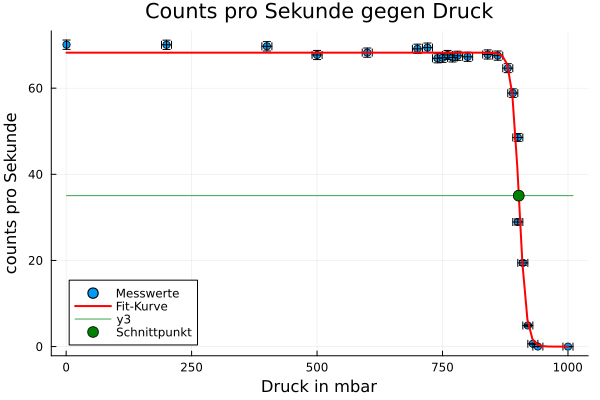

0

In [2]:
d_1 = 34      #Gewählter Abstand

### Plotte Messergebnisse
p1 = plot_p_counts("d1.csv", 750.0, d_1)



## d2  = 35


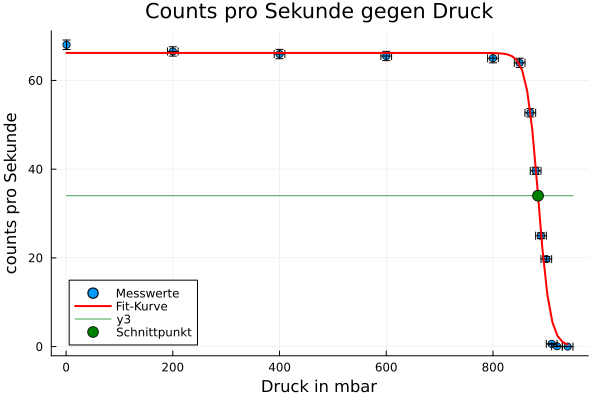

fit_params = fit_result.param = [66.19829581088442, -0.09123464893799905, 885.0755989683912]
884.4677725015298


0

In [3]:
d_2 = 35     #Gewählter Abstand

### Plotte Messergebnisse
p2 = plot_p_counts("d2.csv", 850.0, d_2)

## d3 = 36

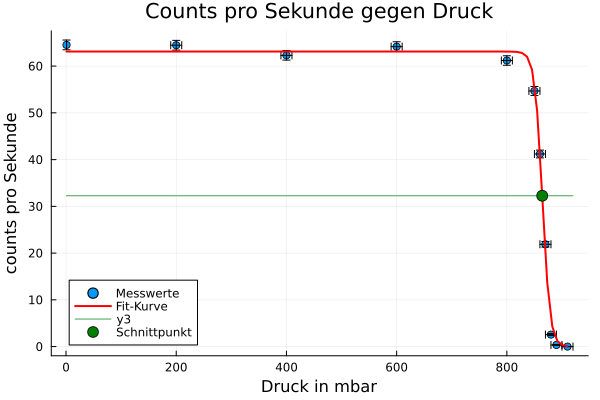

fit_params = fit_result.param = [63.113406119067065, -0.14523799220293376, 864.4453566715443]
864.13549524668


0

In [4]:
d_3 = 36      #Gewählter Abstand

### Plotte Messergebnisse
p3 = plot_p_counts("d3.csv", 850, d_3)

## d4 = 37

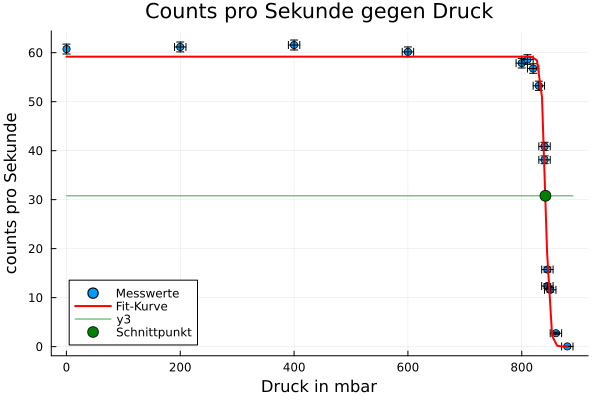

fit_params = fit_result.param = [59.19621280479715, -0.2855153152419249, 841.9051968794215]
841.6245433774301


0

In [5]:
d_4 = 37      #Gewählter Abstand

### Plotte Messergebnisse
p4 = plot_p_counts("d4.csv", 850, d_4)

# Mit Folie

## Probe 1 Gold d = 23

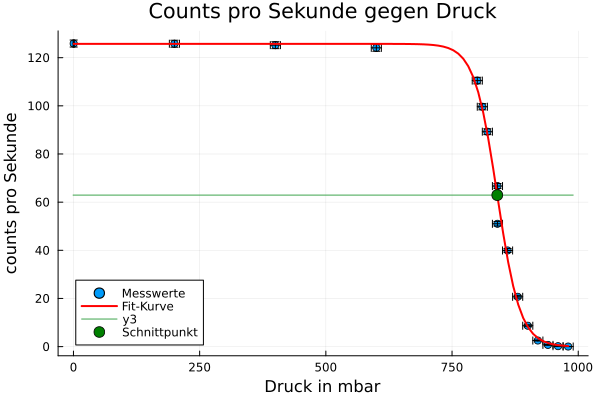

fit_params = fit_result.param = [125.7363926436414, -0.043992771114813777, 839.6280595222837]
839.5809568376636


0

In [6]:
d_G = 23      #Gewählter Abstand

### Plotte Messergebnisse
pg = plot_p_counts("gold.csv", 850,d_G)

## Probe 2, Alu 16mm

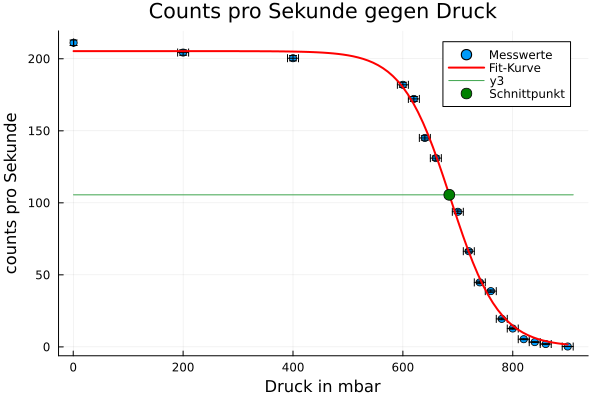

fit_params = fit_result.param = [205.31729596809348, -0.022681567923527015, 686.9647503535704]
684.4734402208912


0

In [7]:
d_A = 16

pa = plot_p_counts("alu.csv",630,init_a_param=200, init_b_param = 0.1 ,d_A)
